# 보스턴 집값 예측
### scaled_input 
- 정규화(예측)
- 표준화(분류)
### 독립변수 상관계수 확인
- 전진선택법
- 후진선택법
- 단계선택법

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [2]:
bost = pd.read_excel("BostonHousing.xls")
bost

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4,0
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6,0
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9,0
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0,0


In [3]:
bost.isna().sum()

CRIM         0
ZN           0
INDUS        0
CHAS         0
NOX          0
RM           0
AGE          0
DIS          0
RAD          0
TAX          0
PTRATIO      0
B            0
LSTAT        0
MEDV         0
CAT. MEDV    0
dtype: int64

In [4]:
bost.isnull().sum()

CRIM         0
ZN           0
INDUS        0
CHAS         0
NOX          0
RM           0
AGE          0
DIS          0
RAD          0
TAX          0
PTRATIO      0
B            0
LSTAT        0
MEDV         0
CAT. MEDV    0
dtype: int64

In [5]:
bo = bost.drop(columns = ["CAT. MEDV","MEDV"])

In [6]:
Y = bost[["MEDV"]]

<AxesSubplot:>

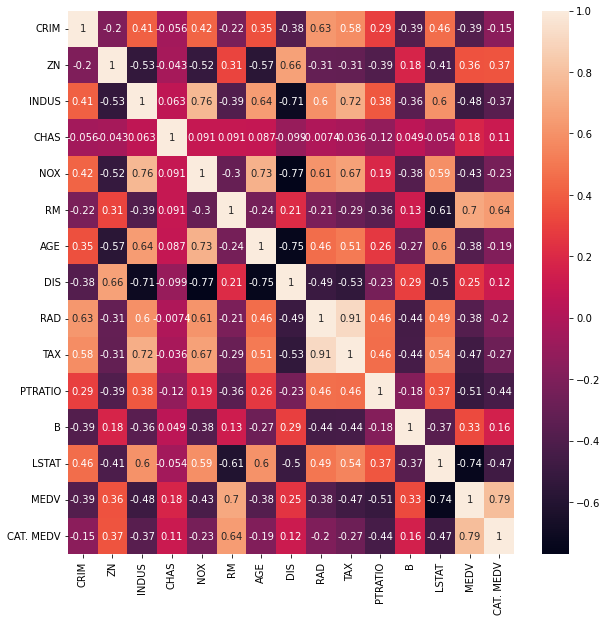

In [7]:
# 상관계수
b_corr = bost.corr()
plt.figure(figsize = (10,10))
sns.heatmap(b_corr, annot=True)

In [8]:
vif = pd.DataFrame()
vif['features'] = bost.columns
vif['VIF factor'] = [variance_inflation_factor(bost.values, i) for i in range(bost.shape[1])]
vif.round(1)

,features,VIF factor
0,CRIM,2.2
1,ZN,3.0
2,INDUS,14.8
3,CHAS,1.2
4,NOX,74.5
5,RM,136.9
6,AGE,21.5
7,DIS,16.0
8,RAD,15.4
9,TAX,61.9


In [9]:
# 정규화

In [10]:
MM = MinMaxScaler()
mm_X = MM.fit_transform(bo)
mm_Y = MM.fit_transform(Y)

In [13]:
# 후진 선택법

In [16]:
# 데이터셋 나누기
Xtrain, Xtest, Ytrain, Ytest =train_test_split(mm_X,mm_Y, test_size = 0.2)
Xtrain, Xval, Ytrain, Yval =train_test_split(Xtrain,Ytrain, test_size = 0.2)

In [18]:
lr = linear_model.LinearRegression()
lr.fit(Xtrain, Ytrain)

LinearRegression()

In [19]:
lr.score(Xval, Yval)

0.8056487554909284

In [11]:
# 표준화

In [22]:
SS = StandardScaler()
ss_X = SS.fit_transform(bo)
ss_Y = SS.fit_transform(Y)

In [23]:
Xtrains, Xtests, Ytrains, Ytests =train_test_split(ss_X,ss_Y, test_size = 0.2)
Xtrains, Xvals, Ytrains, Yvals =train_test_split(Xtrains,Ytrains, test_size = 0.2)

In [24]:
lr = linear_model.LinearRegression()
lr.fit(Xtrains, Ytrains)

LinearRegression()

In [25]:
lr.score(Xvals, Yvals)

0.6590113039261808